In [1]:
import pandas as pd
import numpy as np
file_path = "/content/traffic.csv"
df = pd.read_csv(file_path)
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [2]:
df.shape

(155489, 9)

In [3]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [4]:
df['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

In [5]:
df.dtypes

,0
event,object
date,object
country,object
city,object
artist,object
album,object
track,object
isrc,object
linkid,object


In [6]:
# Check if 'date' column exists. If not, create one.
if 'date' not in df.columns:
  # Add a dummy date column (replace with actual date if available)
  df['date'] = '2024-01-26'

df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()
y = df['event'].value_counts()
y

,count
event,
pageview,42649
click,32499
preview,16708


In [7]:
Event_sort_date = df[df['event']=='pageview'].groupby('date')['event'].count().sort_values(ascending=False)
                                                                #changed 'data' to 'date'
Event_sort_date

,event
date,
2021-08-19,7372
2021-08-20,6405
2021-08-21,5916
2021-08-25,5878
2021-08-22,5816
2021-08-23,5643
2021-08-24,5619


In [8]:
recorded_events = set(df['event'].unique())
recorded_events.remove("pageview")
recorded_events # changed 'rrecorded_events' to 'recorded_events'

{'click', 'preview'}

In [9]:
for recorded_event in recorded_events:
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is ", total_events, "/n")
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "eventdistribution per day:/n")
    print(data_set,"/n")

Total number of click events is  32499 /n
click eventdistribution per day:/n
date
2021-08-19    5860
2021-08-20    4999
2021-08-21    4279
2021-08-22    4421
2021-08-23    4314
2021-08-24    4231
2021-08-25    4395
Name: event, dtype: int64 /n
Total number of preview events is  16708 /n
preview eventdistribution per day:/n
date
2021-08-19    2290
2021-08-20    2449
2021-08-21    2483
2021-08-22    2524
2021-08-23    2379
2021-08-24    2355
2021-08-25    2228
Name: event, dtype: int64 /n


In [10]:
Countries= pd.DataFrame(data = df[df['event']=='pageview'].groupby('country')['event'].count().sort_values(ascending=False))
Countries.head(10)

,event
country,
United States,9564
India,6862
France,3507
Saudi Arabia,2734
United Kingdom,1718
Germany,1432
Turkey,941
Canada,913
Pakistan,875


In [11]:
link_clicks = df[df["event"] == "click"].groupby(by=["linkid"])["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={"event": "clicks"})

pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={
    "event": "pageviews"
})

In [12]:
link_clicks.head()


,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,6
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [13]:
df_q4 = pageviews.merge(link_clicks, on="linkid", how="inner") # Assigns the merged dataframe to df_q4
df_q4["click_rate"] = df_q4["clicks"] /df_q4["pageviews"]
df_q4

,linkid,pageviews,clicks,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,1,2,2.000000
1,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,2,1.000000
2,006af6a0-1f0d-4b0c-93bf-756af9071c06,14,6,0.428571
3,00759b81-3f04-4a61-b934-f8fb3185f4a0,2,3,1.500000
4,00829040-ee01-4409-966d-d67c7965144a,11,14,1.272727
...,...,...,...,...
1583,ffd3c9e7-c5c5-4f28-b03d-cbaec33f2152,37,53,1.432432
1584,ffd73f8e-4481-57d7-8285-9b76993b83aa,1,1,1.000000
1585,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,34,25,0.735294
1586,fffc17a7-f935-5d3e-bd3e-d761fd80d479,2,1,0.500000


In [14]:
df_q4['click_rate'].describe()

,click_rate
count,1588.000000
mean,1.005213
std,2.185165
min,0.166667
25%,0.757009
50%,1.000000
75%,1.000000
max,86.666667


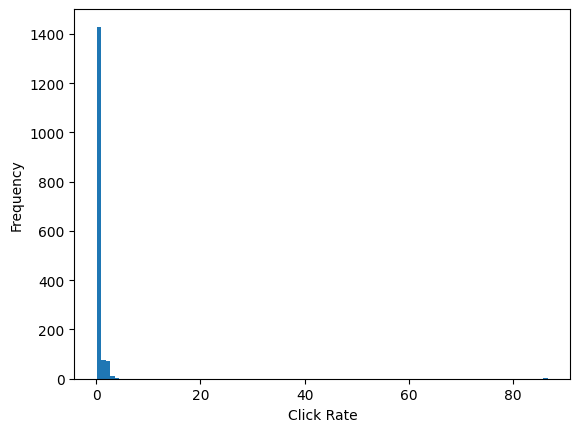

In [15]:
ax = df_q4['click_rate'].plot(kind='hist', bins=100) # Changed kind-'hist' to kind='hist' and bins-100 to bins=100
we = ax.set_xlabel('Click Rate') # Removed extra space before we and changed ax.set xlabel to ax.set_xlabel

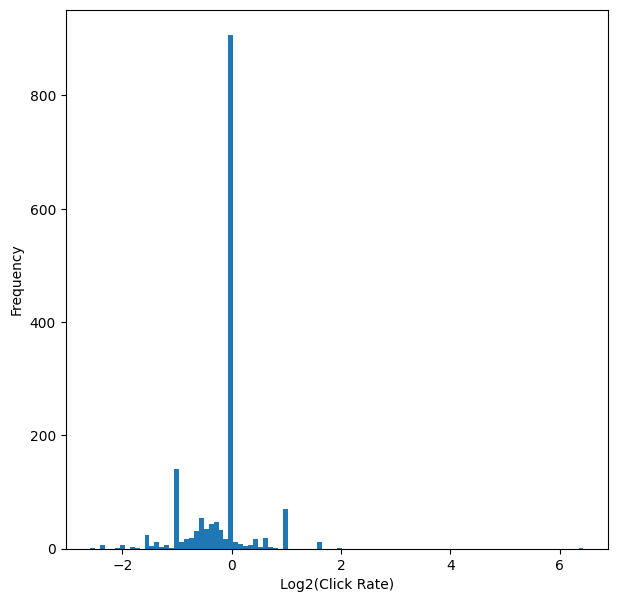

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])

ax = df_q4["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)

_= ax.set_xlabel("Log2(Click Rate)")

plt.show()

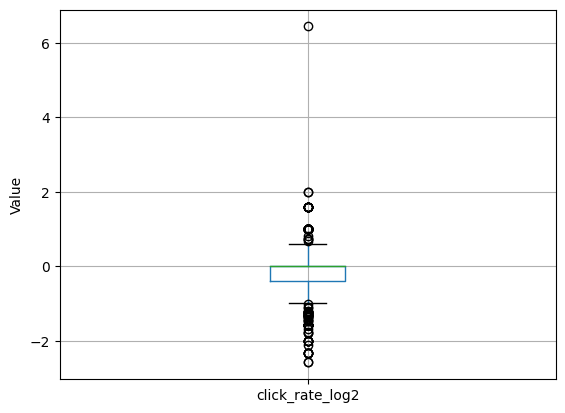

In [17]:
ax = df_q4.boxplot(column="click_rate_log2")
_= ax.set_ylabel("Value")


In [19]:
link_click = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_click = link_click.rename(columns={
"event": "clicks"
})
perviews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
perviews = perviews.rename(columns={
    "event": "perviews"
})

In [22]:
df_q6 = pd.merge(left=df_q4, right=link_click, how="left", on="linkid")
df_q6 = pd.merge(left=df_q4, right=perviews, how="left", on="linkid")
df_q6.dropna(subset=["clicks", "perviews"], inplace=True)
df_q6

,linkid,pageviews,clicks,click_rate,click_rate_log2,perviews
2,006af6a0-1f0d-4b0c-93bf-756af9071c06,14,6,0.428571,-1.222392,11.0
3,00759b81-3f04-4a61-b934-f8fb3185f4a0,2,3,1.500000,0.584963,1.0
4,00829040-ee01-4409-966d-d67c7965144a,11,14,1.272727,0.347923,9.0
8,00de7566-f014-4d20-8616-82e4dea45b88,5,1,0.200000,-2.321928,1.0
20,0211bf4d-0e9d-46c2-889c-f97872280820,196,81,0.413265,-1.274860,106.0
...,...,...,...,...,...,...
1576,fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,304,236,0.776316,-0.365284,93.0
1578,fe24ad63-e347-40db-8e75-94e573bd3d9b,6,6,1.000000,0.000000,1.0
1579,fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,170,90,0.529412,-0.917538,50.0
1580,fe8f7a23-be9d-49a6-b9b5-d26823c3f911,42,34,0.809524,-0.304855,19.0


In [28]:
df_q6 = pd.merge(left=df, right=link_click, how="left", on="linkid") # Changed df_q6 to df in the first merge
df_q6 = pd.merge(left=df_q6, right=perviews, how="left", on="linkid")
# Instead of dropping rows with NA, fill them with 0
df_q6["clicks"] = df_q6["clicks"].fillna(0)
df_q6["perviews"] = df_q6["perviews"].fillna(0)
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,perviews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
1,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,684.0,432.0
2,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,46.0,26.0
3,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
4,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02,523.0,331.0
...,...,...,...,...,...,...,...,...,...,...,...
91851,pageview,2021-08-19,France,Unknown,Dixie,FUCKBOY,FUCKBOY,ZZOPM2105343,dc1e0321-73a5-4254-bce4-57e4fa9c562b,6.0,10.0
91852,pageview,2021-08-22,United States,Ocala,Remble,Touchable,Touchable,USWB12101349,561bff5d-03fd-45c2-87e0-0d9593182b57,338.0,123.0
91853,pageview,2021-08-22,India,Agra,"Surf Mesa, Emilee",ily (i love you baby) (feat. Emilee),ily (i love you baby) (feat. Emilee),QZJRC1945204,c2c876ab-b093-4750-9449-6b4913da6af3,579.0,472.0
91854,pageview,2021-08-22,United Kingdom,Watford,PinkPantheress,Just for me,Just for me,GBAYE2101058,e2e39afa-648b-4163-97b0-ce742ea67550,243.0,87.0


In [29]:
cols= ['clicks','perviews'] # changed 'click' to 'clicks' and 'previews' to 'perviews'
x = df_q6[cols]
y = df_q6['event'] # changed 'events' to 'event'
x.corr()

,clicks,perviews
clicks,1.000000,0.982992
perviews,0.982992,1.000000


In [30]:
from scipy import stats
stats.pearsonr(df_q6["clicks"], y=df_q6["perviews"])

PearsonRResult(statistic=0.9829918181188986, pvalue=0.0)